In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
x=np.arange(0,6,0.1)

In [4]:
y1=np.sin(x)
y2=np.cos(x)

Text(0, 0.5, 'y')

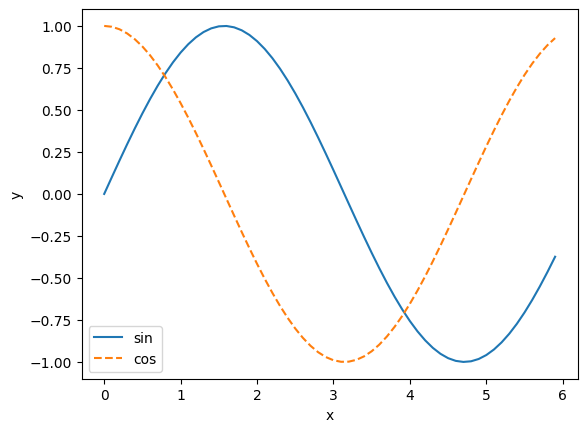

In [5]:
plt.plot(x,y1,label='sin')
plt.plot(x,y2,linestyle='--',label='cos')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

In [6]:
x=np.array([1,2])

In [7]:
y=x>0

In [8]:
y.astype(int)

array([1, 1])

In [9]:
a='s'

### 阶跃函数

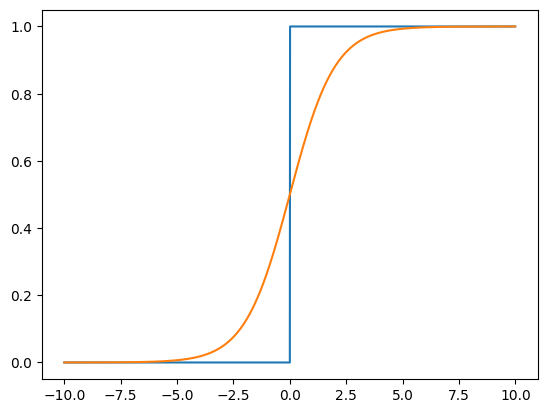

In [10]:
def step_functio(x):
    return (x>0).astype(int)
x=np.arange(-10,10,0.01)
y1=step_functio(x)
def sigmoid(x):
    return 1/(1+np.exp(-x))
y2=sigmoid(x)

plt.plot(x,y1)
plt.plot(x,y2)

In [11]:
np.max
np.maximum

<ufunc 'maximum'>

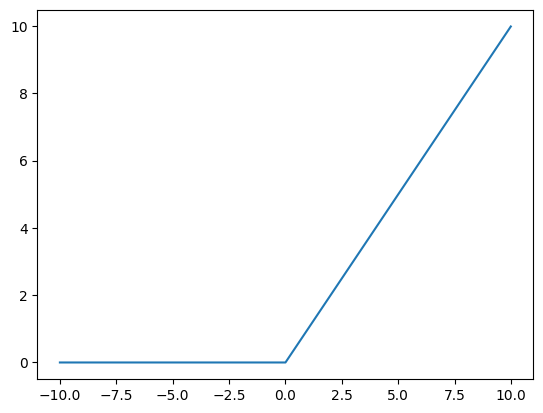

In [12]:
def relu(x):
    return np.maximum(0,x)
x=np.arange(-10,10,0.01)
y1=relu(x)
plt.plot(x,y1)

### 矩阵乘法

In [13]:
x=np.array([[1,2,3],[2,3,4]])
y=np.array([1,1,1,1,1,1]).reshape(3,2)

In [14]:
np.dot(x,y)

array([[6, 6],
       [9, 9]])

### 神经网络实现

In [15]:
def init_network():
    network={}
    network['W1']=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1']=np.array([0.1,0.2,0.3])
    network['W2']=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2']=np.array([0.1,0.2])
    network['W3']=np.array([[0.1,0.3],[0.2,0.4]])
    network['b3']=np.array([0.1,0.2])
    return network


def softmax(x):
    ##softmax溢出对策
    c=np.max(x)
    return np.exp(x-c)/(np.exp(x-c)).sum()

def sigmoid(x):
    return 1/(1+np.exp(-x))

def identity_function(x):
    return softmax(x)



In [16]:
def forward(network,x):
    W1,W2,W3=network['W1'],network['W2'],network['W3']
    b1,b2,b3=network['b1'],network['b2'],network['b3']
    #第一层
    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    #第二层
    a2=np.dot(z1,W2)+b2
    z2=sigmoid(a2)
    #第三层
    a3=np.dot(z2,W3)+b3

    
    y=identity_function(a3)
    return y

In [17]:
x=np.array([1.0,0.5])
forward(init_network(),x)

array([0.40625907, 0.59374093])

In [18]:
def softmax(x):
    c=np.max(x)
    return np.exp(x-c)/(np.exp(x-c)).sum()

### 手写体识别

In [19]:
import os
import sys
sys.path.append("./book_material")
from dataset.mnist import load_mnist
import numpy as np
from PIL import Image
import pickle


In [20]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

1. 数据本质未丢失

虽然归一化后像素值范围从0-255变为0-1，但所有像素间的相对亮度关系完全保留
例如原本127灰度的像素会变成0.5，依然是中等亮度值
模型通过相对亮度识别特征，而非绝对像素值

如果不归一化，会存在非常大的数导致e-x出现内存溢出

In [21]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True,one_hot_label=False)
    return x_test, t_test
def init_network():
    with open(r"./book_material/ch03/sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network
def predict(network, x):
    W1,W2,W3=network['W1'],network['W2'],network['W3']
    b1,b2,b3=network['b1'],network['b2'],network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

In [22]:
x_test,t_test=get_data()
network=init_network()

In [23]:
accracy=0
for i in range(x_test.shape[0]):
    y=predict(network,x_test[i])
    r=np.argmax(y)
    if r==t_test[i]:
        accracy+=1
print(accracy/x_test.shape[0])

0.9352


### 神经网络的学习

In [24]:
def mean_square_error(y,t):
    return 0.5*np.sum((y-t)**2)

y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

mean_square_error(y,t)

np.float64(0.09750000000000003)

In [25]:
###one hot 编码
def cross_entropy_error(y,t):
    if y.ndim==1:
        batch_size=1
    else:
        batch_size=y.shape[0]
    delta=1e-7
    return -np.sum(t*np.log(y+delta))/batch_size
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
cross_entropy_error(y,t)

##非 one hot 编码
def cross_entropy_error(y,t):
    if y.ndim==1:
        y=y.reshape(1,-1)
        t=t.reshape(1,-1)
    batch_size=y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size

In [26]:
y=np.array([[1,2,3],[2,3,4]])
t=np.array([1,2])
####当使用 y[rows, cols] 时：
# rows 和 cols 必须是相同长度的数组。
# NumPy 会按位置配对索引：取 rows[i] 行，cols[i] 列的值。
y[np.arange(2),t]

array([2, 4])

#minibatch

In [27]:
###minibatch
batch_mask=np.random.choice(60000, 10)
(x_train, t_train), (x_test, t_test) = \
 load_mnist(normalize=True, one_hot_label=True)
x_train[batch_mask].shape

(10, 784)

#导数

In [28]:
def numerical_diff(f,x):
    h=10e-5
    return (f(x+h) - f(x-h))/(2*h)

In [29]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [30]:
numerical_diff(function_1,5)

0.1999999999990898

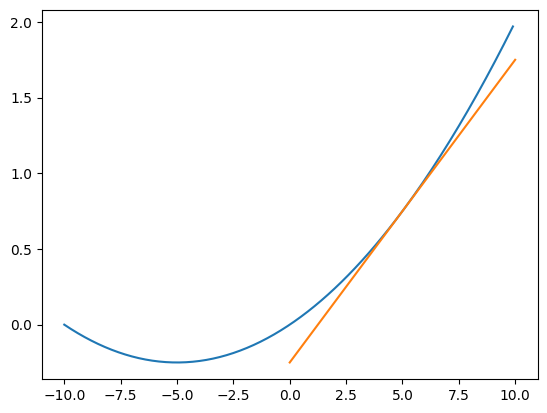

In [31]:
import matplotlib.pyplot as plt
x=np.arange(-10,10,0.1)
y=function_1(x)
plt.plot(x,y)

x0, y0 = 5, function_1(5)  # 已知点
k = numerical_diff(function_1,5)       # 斜率

# 生成两个 x 值（例如 x=0 和 x=5），计算对应的 y 值
x_values = np.array([0, 10])
y_values = k * (x_values - x0) + y0
plt.plot(x_values, y_values)
plt.show()

#偏导数

In [32]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [33]:
def numerical_diff(f,x):
    h=1e-5
    ##主要问题在于 未处理输入数组 x 的数据类型，尤其是当 x 为整数类型时，添加微小量 h 会被截断，导致梯度计算错误
    x=x.astype(np.float64)
    grad=np.zeros_like(x)
    for i in range(x.size):
        tmp_val=x[i]

        x[i]=tmp_val+h

        fxh1=f(x)

        x[i]=tmp_val-h
        fxh2=f(x)

        grad[i]=(fxh1-fxh2)/(2*h)

        x[i]=tmp_val
    return grad

In [34]:
numerical_diff(function_2,np.array([3,4]))

array([6., 8.])

#梯度下降  学习率被称为超参数 与神经网路权重w和偏置b无关的参数

In [48]:
def grad_descent(f,init_x,learning_rate,num_iters=100):
    x=init_x
    for i in range(num_iters):
        numerical_diff(f,x)
        x=x-numerical_diff(f,x)*learning_rate
    return x


In [51]:
grad_descent(function_2,np.array([-3.0,4.0]),0.1,100)

array([-6.11110793e-10,  8.14814391e-10])

#神经网络的梯度

In [6]:
import os
import sys
import numpy as np
sys.path.append("./")
from common import functions

In [14]:
class SimpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
    def predict(self, x):
        return np.dot(x, self.W)
    def loss(self, y, t):
        z=self.predict(x)
        y=functions.softmax(z)
        loss = functions.cross_entropy_error(y,t)
        return loss

In [15]:
net=SimpleNet()
net.W
x=np.array([0.6,0.9])
p=net.predict(x)
t=np.array([0,0,1])

In [16]:
np.argmax(p)

2

In [17]:
net.loss(p,t)

0.9659231542474426